<a href="https://colab.research.google.com/github/Varsha-commuri/Projects/blob/main/parkinsons1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVM Accuracy: Train = 0.9936, Test = 0.9487
Logistic Regression Accuracy: Train = 0.8654, Test = 0.9231

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39

SVM Confusion Matrix:
 [[ 9  1]
 [ 1 28]]


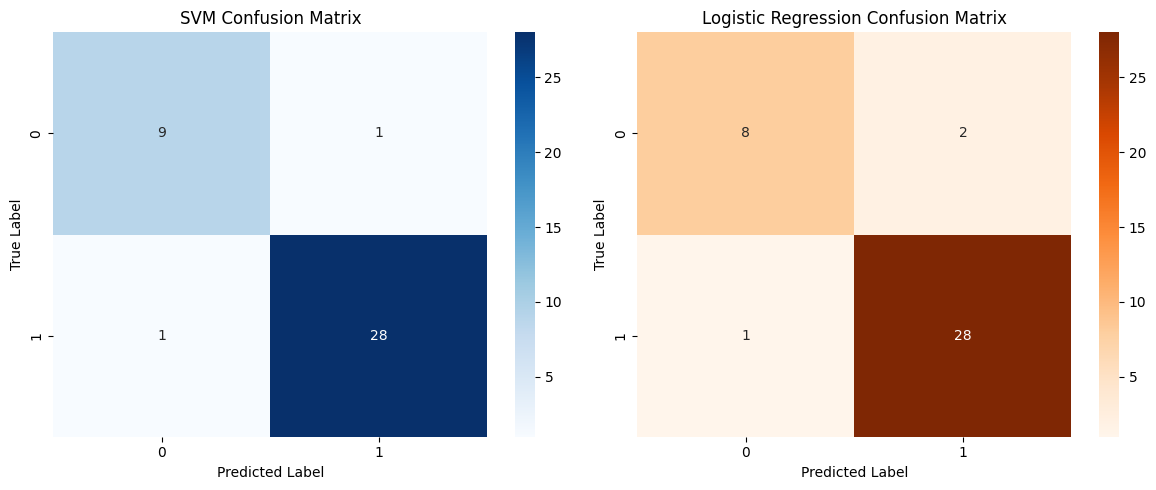

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
parkinsons_data = pd.read_csv("/content/parkinsons.csv")

# Drop unnecessary columns
X = parkinsons_data.drop(columns=["name", "status"], axis=1)
Y = parkinsons_data["status"]

# Split dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -------------------
# 1️⃣ Support Vector Machine (SVM) with Hyperparameter Tuning
# -------------------
svm_model = SVC(kernel='rbf', C=10, gamma=0.1)  # Tuned hyperparameters
svm_model.fit(X_train, Y_train)

# Predictions
svm_train_pred = svm_model.predict(X_train)
svm_test_pred = svm_model.predict(X_test)

# Accuracy
svm_train_acc = accuracy_score(Y_train, svm_train_pred)
svm_test_acc = accuracy_score(Y_test, svm_test_pred)

# -------------------
# 2️⃣ Logistic Regression (Baseline Model)
# -------------------
log_model = LogisticRegression()
log_model.fit(X_train, Y_train)

log_train_pred = log_model.predict(X_train)
log_test_pred = log_model.predict(X_test)

log_train_acc = accuracy_score(Y_train, log_train_pred)
log_test_acc = accuracy_score(Y_test, log_test_pred)

# -------------------
# Results Comparison
# -------------------
print(f"SVM Accuracy: Train = {svm_train_acc:.4f}, Test = {svm_test_acc:.4f}")
print(f"Logistic Regression Accuracy: Train = {log_train_acc:.4f}, Test = {log_test_acc:.4f}")

# -------------------
# 3️⃣ Model Evaluation (Confusion Matrix & Classification Report)
# -------------------
print("\nSVM Classification Report:\n", classification_report(Y_test, svm_test_pred))
print("SVM Confusion Matrix:\n", confusion_matrix(Y_test, svm_test_pred))

# -------------------
# 4️⃣ Plot Confusion Matrices
# -------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(Y_test, svm_test_pred), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("SVM Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(confusion_matrix(Y_test, log_test_pred), annot=True, fmt="d", cmap="Oranges", ax=axes[1])
axes[1].set_title("Logistic Regression Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()
